In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import shutil
from train import run
import os

def write_errormsg2file(msg, error_file_name):
    if not os.path.isfile(error_file_name):
        with open(error_file_name, 'w') as f:
            f.write(f'error : {msg}\n')
    else:
        with open(error_file_name, 'a') as f:
            f.write(f'error : {msg}\n')

In [3]:
def do_exps(Ts, rotation_lambdas, lr_Hs, lambda_scale_factors, img_sizes, ht_init_methods, device, exp_dir = '../figs/test', save_special= False):
    exp_idx=0
    
    for ht_init_method in ht_init_methods:
        for img_size in img_sizes:
            for T in Ts:
                for rotation_lambda in rotation_lambdas:
                    for lr_H in lr_Hs:
                        for lambda_scale_factor in lambda_scale_factors:

                            exp_idx+=1

                            name= f'exp_idx({exp_idx})'
                            save_dir= f'{exp_dir}/ht_init_method({ht_init_method})@img_size({img_size})@T({T})@rotation_lambda({rotation_lambda})@lr_H({lr_H})@lambda_scale_factor({lambda_scale_factor})'
                            H_enable_train=str(lr_H!='0.0')

                            try:shutil.rmtree(save_dir)
                            except:pass

                            opts = [
                                'NAME', name,
                                'GENERAL.device', device,
                                'GENERAL.save_dir', save_dir,
                                'MODEL.MODEL_H.T', T,
                                'MODEL.MODEL_H.lr_H', lr_H,
                                'MODEL.MODEL_H.enable_train', H_enable_train,
                                'MODEL.MODEL_H.H_init', ht_init_method,
                                'MODEL.MODEL_A.scale_factor', lambda_scale_factor,
                                'MODEL.MODEL_A.rotation_lambda',rotation_lambda,
                                'DATASET.img_size', img_size,                                
                            ]


                            try:
                                run(opts= opts, save_special=save_special)
                            except:
                                error_file_name = f'{exp_dir}/errors.txt'
                                write_errormsg2file(f'ERROR : {save_dir}', error_file_name)
                                print(f'ERROR : {save_dir}')

In [4]:
exp_dir= '../figs/mnistv13'

yt range (test): [-0.0043803621083498 1.0647368431091309]
training loop time (for single epoch): 3.585096597671509 sec


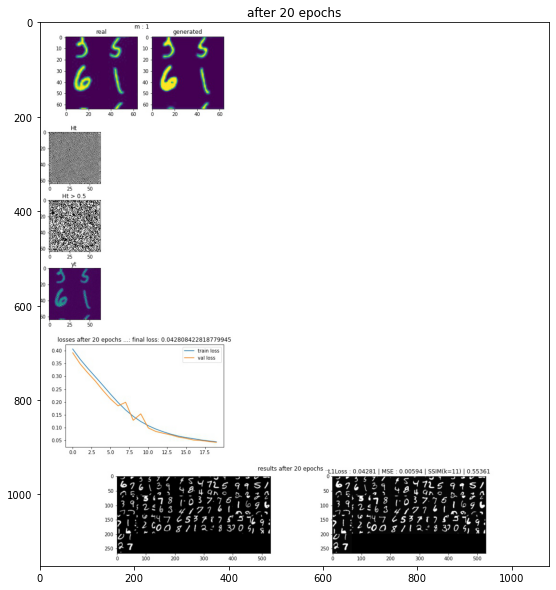

m : 1


In [ ]:
device= 'cuda:2'

img_sizes= ['64', '128']
Ts=['1', '2', '4', '8', '16', '32']
rotation_lambdas= ['1000.0'] #['10.0', '100.0', '1000.0', '10000.0']
lr_Hs= ['1.0', '0.0']
lambda_scale_factors= ['1', '2', '3', '4']
ht_init_methods= ['randn_FourierBased', 'uniformones_FourierBased', 'hadamard_FourierBased']

do_exps(Ts, rotation_lambdas, lr_Hs, lambda_scale_factors, img_sizes, ht_init_methods, device, exp_dir = exp_dir, save_special= False)